Building a notebook from scratch

In [1]:
%autosave 0

UsageError: %autosave requires an integer, got ''


In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

In [3]:
#this will be a one sample ttest
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


if the size of the party influence how much you tip

Null: size 2 party tip the same amount as any party in my dataset  #this is a one tail test

Alternative: size 2 parties tip a different amount from any party in my dataset. #this is a two tail test

In [11]:
#define population mean
overall_tip = df.tip.mean()

In [32]:
#find my sample , we are looking for size 2 parties to define sample distribution
tip_for_two = df[df['size']== 2].tip    #this will give you a distribution of value for one sample for the 
#ttest and a population mean

In [33]:
t_two, p_two = stats.ttest_1samp(tip_for_two, overall_tip)
t_two, p_two
#want to compare sample distribution to the mean so put in distribution first

(-5.271912239283316, 4.4632473980137726e-07)

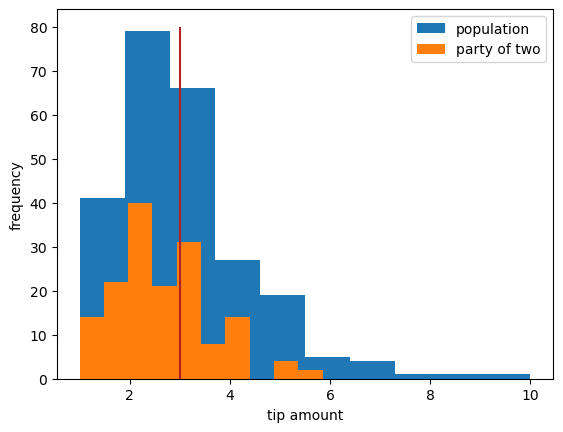

In [34]:
plt.hist(df.tip, label = 'population')
plt.hist(tip_for_two, label = 'party of two')
plt.vlines(overall_tip, 0, 80, color = 'firebrick')   #with this red line, we see there is a negative t-value
plt.xlabel('tip amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [29]:
a = 0.05
if p_two < a:
    print('we reject the null hypothesis.')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


#New test

Null: guests for dinner pay less than or the same amount as guests for lunch

Alternative: Guests for dinner pay more than guests for lunch 
    
#This will be a 2-sampl, 1-tailed t-test

In [35]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [36]:
#im interested in the total bill and the time column
df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [43]:
#set up boolean mass to create distribution for data. get a dataframe return. use total_bill for distribution
lunch_bills = df[df.time == 'Lunch'].total_bill
#store this as a variable in order to create a comparison

In [44]:
#since this is a 2 sample t-test, you need another sample
dinner_bills = df[df.time == 'Dinner'].total_bill

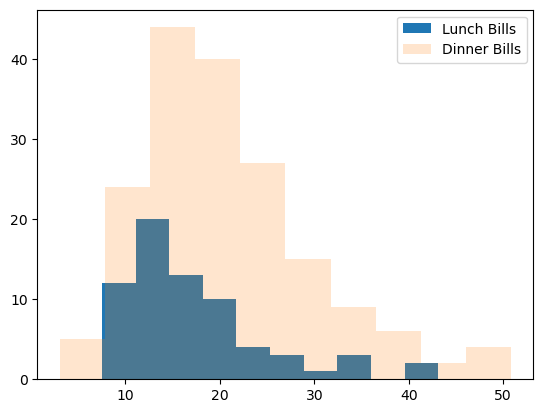

In [47]:
plt.hist(lunch_bills, label = 'Lunch Bills')
plt.hist(dinner_bills, label = 'Dinner Bills', alpha = 0.2)   #use alpha to make things all distribution visible
plt.legend()
plt.show()

In [48]:
t_time, p_time = stats.ttest_ind(dinner_bills, lunch_bills)
t_time, p_time
#it appears that dinner bills are bigger 

(2.8976375218366424, 0.004104621407595676)

In [53]:
a = 0.05
if (t_time > 0) and(p_time / 2 < a):   #we are dividing it by two because 
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


In [54]:
stats.ttest_ind(lunch_bills, dinner_bills)
# you can see the statistic is negative intead of positive due to the placement of the comparison

Ttest_indResult(statistic=-2.8976375218366424, pvalue=0.004104621407595676)